# Recurrent Neural Networks

A shared feature of all the neural networks we have seen so far is that they have no memory. Each input is processed independently, with no state kept in between inputs. This means that if we want to work with sequences using these architectures, the input of the network must be the entire sequence, which is precisely what we did in the last notebook with the IMDB reviews. These type of architectures are called **feedforward networks**.

Feedforward networks are not the best option for working with sequences mainly for the followitng reasons:

- Lenghts of both input and output sequences are not always the same. One could think that we could get away with either truncation or padding of said sequences, but this is not necessarily the best representation of this type of data. 

- We could end up with networks that have a lot of parameters, which is inconvenient for several reasons such as the training of very large models, or the risk of easily overfitting the data.

- This type of architectures are not able to share features learned across different positions of, say, texts. 

Biological intelligence processes information incrementally while maintaining an internal model of what it is processing, built from past information and constantly updated as new information comes in.
A **Recurrent Neural Network (RNN)** adopts the same principle in an extremely simplified manner: it processes sequences by iterating through the sequence elements and maintaining a state containing information relative to what it has seen so far. The following figure shows a representation of a RNN.

<center>
<img src='https://drive.google.com/uc?id=1mGIpRFFvrVvUZEYWuL0Va_gFwIOs0T7b' width="200" height="300"/>
<figcaption>RNN. Image taken from [3].</figcaption>
</center>

RNN can be understood as a type of ANN that is good at modeling sequential data. With traditional networks we assume that inputs and outputs are independent of each other, which is not true for sequences since a value on a sequence at a given time depends on the prior elements within the sequence. In other words, an RNN is a hidden layer that remembers information through the passage of time.

## Unfolding a RNN

Speaking of time, another way of visualizing a RNN is picture what happens with it it over time, as shown in the following figure.

<center>
<img src='https://drive.google.com/uc?id=1lQDrLECV3EWKLhUUi_sVToOTHDKhXaI3' width="600" height="250"/>
<figcaption>RNN unfolded over time. Image taken from [2].
</figcaption>
</center>

For each time step $t$, we have that $a^{\langle t \rangle}$ and $y^{\langle t \rangle}$ are equal to

$$a^{\langle t \rangle}=g_1(W_{aa}a^{\langle t-1 \rangle}+W_{ax}x^{\langle t \rangle}+b_a),$$

$$y^{\langle t \rangle}=g_2(W_{ya}a^{\langle t \rangle}+b_y),$$

where $W_{aa}$, $W_{ax}$, $W_{ya}$, $b_{a}$ and $b_{y}$ are the parameters of the RNN layer, and $g_1$ and $g_2$ are activation functions.

By the way, this representation was useful for implementing a variant of the backpropagation algorithm for RNNs, which is known as **backpropagation through time**.

## Types of RNN

There are several variations of the RNN architecture that can be implemented in different types of aplications. The following are the most common.

### One-to-One

<center>
<img src='https://drive.google.com/uc?id=1w59EnX8MFFlfycHEnCEL6IjnPepK2c27' width="150" height="250"/>
<figcaption>One-to-One. Image taken from [2].
</figcaption>
</center>

Let $T_x$ and $T_y$ be the number of inputs and outputs of the RNN. Then, when $T_x=T_y=1$, we have the most conventional type of RNN: **One-to-One**. It has fixed input and output sizes and acts as a standard neural network. The One-to-One application can be found in **Image Classification**.

### One-to-Many

<center>
<img src='https://drive.google.com/uc?id=17PehuJdZCtgBQD4lWDOY-O0892GcO0IW' width="400" height="250"/>
<figcaption>One-to-many. $T_x=1$, $T_y>1$. Image taken from [2].
</figcaption>
</center>

**One-to-Many** is a type of RNN that produces multiple outputs given a single input. The input size is fixed and gives a series of data outputs. Its applications It can be found in applications such as **Music Generation** and **Image Captioning**.

### Many-to-One

<center>
<img src='https://drive.google.com/uc?id=1nNEnJGv2jNM-BIBrYg0GCh3NKeAolMpY' width="400" height="250"/>
<figcaption>Many-to-One. $T_x>1$, $T_y=1$. Image taken from [2].
</figcaption>
</center>

From a sequence of inputs, the **Many-to-One** RNN produces a single output with the aid of a series of hidden layers learning the features. **Sentiment Analysis** is a common example of this type of RNN.

### Many-to-Many

<center>
<img src='https://drive.google.com/uc?id=1M8PsjVoRjT5220V5hpiiiZurOQFIjEUs' width="400" height="250"/>
<figcaption>Many-to-Many. $T_x=T_y$. Image taken from [2].
</figcaption>
</center>

<center>
<img src='https://drive.google.com/uc?id=1Irq-NC9TJLOJXd_BRVanNXdYBDiZ1qD2' width="500" height="250"/>
<figcaption>Many-to-many. $T_x\neq T_y$. Image taken from [2].
</figcaption>
</center>

Many-to-Many is used to generate a sequence of output data from a sequence of input units. When $T_x=T_y$, the input and output layer size is exactly the same. If $T_x\neq T_y$, inputs and outputs have different numbers of units. Its application can be found in **Machine Translation**.

## Advantages and Disadvantages of RNNs

Some of the advantages of RNNs are the following:

- RNN architecture is designed it such a way than it can process inputs of any length. Even with the input size growing larger, the model size does not increase.

- An RNN model is modeled to remember each information throughout the time, which is very helpful in any time series predictor.

- The internal memory of Recurrent Neural Networks is an inherent property that is used for processing arbitrary series of inputs, which is not the case with feedforward neural networks.

As for the drawbacks, we have these issues with RNNs:

- Training of RNN models can be very difficult and time-consuming as compared to other Artificial Neural Networks.

- It becomes very difficult to process sequences that are very long if the activation functions used are ReLu or tanh as activation functions.

- Prone to problems such as exploding and gradient vanishing. 

- RNNs cannot be stacked into very deep models.

- RNNs are not able to keep track of long-term dependencies.

- RNNs can not consider any future input for the current state.

## RNNs in action

Let us see how a simple RNN performs doing sentiment analisys on the IMDB dataset. As usual, let us import some modules and libraries.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

This application is the one we already implemented using a ANN with an `Embedding` layer and a `Dense` layer, so our model will have to predict if a movie review is *positive* or *negative*. The data we will work with is the **IMDB** database that is already included in `keras`. For now, let us import the data limiting the number of the most frequent words we will handle (`max_features`), and also truncating, or padding, the reviews so that they have `maxlen` words.

In [17]:
max_features = 10000
maxlen = 500

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = tf.keras.preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


We will build a neural network that will have a `SimpleRNN` layer on top of the `Embedding` layer. In this case, the dimensionality of the embedding space is 32, which means that the dimensionality of the input of the `SimpleRNN` layer is also 32. Notice that this is also the dimensionality of the output of the `SimpleRNN` layer. 

By the way, regarding the number of parameters of the `SimpleRNN` layer, the number of trainable parameters of this layer is equal to

$$\dim(W_{aa})+\dim(W_{ax})+\dim(b_a)$$.

In this case, we have that

$$32\times32+32\times32+32\times1=2080.$$

In [18]:
model = Sequential([
                    Embedding(max_features, 32),
                    SimpleRNN(32),
                    Dense(1, activation='sigmoid')
                   ]) 
                   
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Let us compile the model. Notice that we are doing binary classification, so the cost function must be `binary_crossentropy`. The evaluation metric will be *accuracy*.

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

And now we train...

In [20]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 174ms/step - loss: 0.6839 - acc: 0.5526 - val_loss: 0.6407 - val_acc: 0.6480
Epoch 2/10
157/157 [==============================] - 26s 164ms/step - loss: 0.5110 - acc: 0.7681 - val_loss: 0.4511 - val_acc: 0.8076
Epoch 3/10
157/157 [==============================] - 26s 163ms/step - loss: 0.3448 - acc: 0.8598 - val_loss: 0.3897 - val_acc: 0.8340
Epoch 4/10
157/157 [==============================] - 25s 160ms/step - loss: 0.2532 - acc: 0.9018 - val_loss: 0.3865 - val_acc: 0.8414
Epoch 5/10
157/157 [==============================] - 27s 173ms/step - loss: 0.1710 - acc: 0.9379 - val_loss: 0.5324 - val_acc: 0.8080
Epoch 6/10
157/157 [==============================] - 26s 163ms/step - loss: 0.1183 - acc: 0.9597 - val_loss: 0.4492 - val_acc: 0.8364
Epoch 7/10
157/157 [==============================] - 26s 163ms/step - loss: 0.0837 - acc: 0.9729 - val_loss: 0.4989 - val_acc: 0.8292
Epoch 8/10
157/157 [==============================] - 2

We get an accuracy of about 80% on the validation set, but we are overfitting the data a bit. Keep in mind that RNNs do not behave that well with long sequences, which could explain in part why the validation accuracy is not higher.Let us visualize these results.

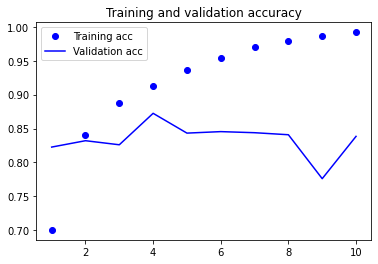

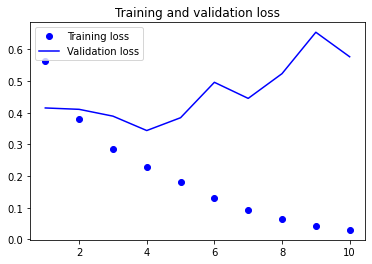

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## "Deep" RNNs 

It is worthwhile to mention that several `SimpleRNN` layers can be stacked on top of each other in order to increase the representational power of a network.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or only the last output for each input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor argument. If we stack `SimpleRNN` layers, all the intermediate `SimpleRNN` layers must have this parameter set to `True`.

 Let us build a model with an extra `SimpleRNN` layer.

In [22]:
model = Sequential([
                    Embedding(max_features, 32),
                    SimpleRNN(32, return_sequences=True),
                    SimpleRNN(32),
                    Dense(1, activation='sigmoid')
                   ]) 
                   
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


Let us see how this model performs on the same dataset. 

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 55s 335ms/step - loss: 0.6468 - acc: 0.6026 - val_loss: 0.8177 - val_acc: 0.6018
Epoch 2/10
157/157 [==============================] - 51s 328ms/step - loss: 0.3864 - acc: 0.8329 - val_loss: 0.3954 - val_acc: 0.8378
Epoch 3/10
157/157 [==============================] - 50s 319ms/step - loss: 0.2546 - acc: 0.8986 - val_loss: 0.5478 - val_acc: 0.7976
Epoch 4/10
157/157 [==============================] - 51s 327ms/step - loss: 0.1708 - acc: 0.9376 - val_loss: 0.7009 - val_acc: 0.7706
Epoch 5/10
157/157 [==============================] - 50s 318ms/step - loss: 0.0903 - acc: 0.9700 - val_loss: 0.6520 - val_acc: 0.8078
Epoch 6/10
157/157 [==============================] - 50s 317ms/step - loss: 0.0505 - acc: 0.9842 - val_loss: 0.6318 - val_acc: 0.8232
Epoch 7/10
157/157 [==============================] - 51s 322ms/step - loss: 0.0370 - acc: 0.9896 - val_loss: 0.8821 - val_acc: 0.7764
Epoch 8/10
157/157 [==============================] - 5

Overfitting has been increased, as expected, but at least you know how to stack `SimpleRNN` layers.

## References

[1] Chollet, Francois. *Deep learning with Python*. Simon and Schuster, 2021.

[2] https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

[3] https://www.v7labs.com/blog/recurrent-neural-networks-guide